In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#READING THE DATA FROM DATASET
data=pd.read_csv('dataflight.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,FLIGHT NAME,SOURCE,DESTINATION,ARRIVAL,DEPARTURE,TIME OF TRAVEL,NO. OF STOP,PRICE,DATE
0,0,0,AirAsia,Delhi,Mumbai,02:15,19:05,07h 10m,2+-stop,3987.0,30-Mar-23
1,1,1,GO FIRST,Delhi,Mumbai,04:50,02:40,02h 10m,non-stop,4202.0,30-Mar-23
2,2,2,GO FIRST,Delhi,Mumbai,09:40,07:25,02h 15m,non-stop,4202.0,30-Mar-23
3,3,3,GO FIRST,Delhi,Mumbai,23:45,21:30,02h 15m,non-stop,4202.0,30-Mar-23
4,4,4,GO FIRST,Delhi,Mumbai,01:00,22:45,02h 15m,non-stop,4202.0,30-Mar-23


In [3]:
data.shape

(1659, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1659 non-null   int64  
 1   Unnamed: 0.1    1659 non-null   int64  
 2   FLIGHT NAME     1659 non-null   object 
 3   SOURCE          1659 non-null   object 
 4   DESTINATION     1659 non-null   object 
 5   ARRIVAL         1659 non-null   object 
 6   DEPARTURE       1659 non-null   object 
 7   TIME OF TRAVEL  1659 non-null   object 
 8   NO. OF STOP     1659 non-null   object 
 9   PRICE           1659 non-null   float64
 10  DATE            1659 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 142.7+ KB


it is observed that almost all features are in object data type 

checking the null value in the data set 

In [5]:
data.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
FLIGHT NAME       0
SOURCE            0
DESTINATION       0
ARRIVAL           0
DEPARTURE         0
TIME OF TRAVEL    0
NO. OF STOP       0
PRICE             0
DATE              0
dtype: int64

In [6]:
data.tail()

,Unnamed: 0,Unnamed: 0.1,FLIGHT NAME,SOURCE,DESTINATION,ARRIVAL,DEPARTURE,TIME OF TRAVEL,NO. OF STOP,PRICE,DATE
1654,1839,895,Go First,Pune,Delhi,15:00,12:55,2h 5m,Non Stop,10983.0,28-Mar-23
1655,1840,896,IndiGo,Pune,Delhi,13:40,05:55,7h 45m,1 stop,11081.0,28-Mar-23
1656,1841,897,IndiGo,Pune,Delhi,06:55,02:15,4h 40m,1 stop,11238.0,28-Mar-23
1657,1842,898,IndiGo,Pune,Delhi,14:15,04:20,9h 55m,1 stop,11679.0,28-Mar-23
1658,1844,900,IndiGo,Pune,Delhi,10:25,02:15,8h 10m,1 stop,13649.0,28-Mar-23


In [7]:
data['PRICE'].value_counts()

12978.0    44
11057.0    25
18533.0    14
4694.0     14
6243.0     14
           ..
15308.0     1
15361.0     1
15517.0     1
16285.0     1
13649.0     1
Name: PRICE, Length: 796, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1659 non-null   int64  
 1   Unnamed: 0.1    1659 non-null   int64  
 2   FLIGHT NAME     1659 non-null   object 
 3   SOURCE          1659 non-null   object 
 4   DESTINATION     1659 non-null   object 
 5   ARRIVAL         1659 non-null   object 
 6   DEPARTURE       1659 non-null   object 
 7   TIME OF TRAVEL  1659 non-null   object 
 8   NO. OF STOP     1659 non-null   object 
 9   PRICE           1659 non-null   float64
 10  DATE            1659 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 142.7+ KB


Extracting the day and month from the date

In [9]:
month=[]
day=[]
date=data['DATE']
for i in date:
    day.append(int(i.split('-')[0]))
    month.append(i.split('-')[1])


In [10]:
day

[30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 

In [11]:
month

['Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',


In [12]:
data['Month']=month
data['Day']=day

In [13]:
data.head()

,Unnamed: 0,Unnamed: 0.1,FLIGHT NAME,SOURCE,DESTINATION,ARRIVAL,DEPARTURE,TIME OF TRAVEL,NO. OF STOP,PRICE,DATE,Month,Day
0,0,0,AirAsia,Delhi,Mumbai,02:15,19:05,07h 10m,2+-stop,3987.0,30-Mar-23,Mar,30
1,1,1,GO FIRST,Delhi,Mumbai,04:50,02:40,02h 10m,non-stop,4202.0,30-Mar-23,Mar,30
2,2,2,GO FIRST,Delhi,Mumbai,09:40,07:25,02h 15m,non-stop,4202.0,30-Mar-23,Mar,30
3,3,3,GO FIRST,Delhi,Mumbai,23:45,21:30,02h 15m,non-stop,4202.0,30-Mar-23,Mar,30
4,4,4,GO FIRST,Delhi,Mumbai,01:00,22:45,02h 15m,non-stop,4202.0,30-Mar-23,Mar,30


droping the date feature as we have extracted the day and month

In [14]:
data=data.drop(['DATE'],axis=1)
data=data.drop(['Unnamed: 0'],axis=1)

droping the unnamed features because it is only the count for no. of rows in the data frame

In [15]:

data=data.drop(['Unnamed: 0.1'],axis=1)

In [16]:
data.head()

,FLIGHT NAME,SOURCE,DESTINATION,ARRIVAL,DEPARTURE,TIME OF TRAVEL,NO. OF STOP,PRICE,Month,Day
0,AirAsia,Delhi,Mumbai,02:15,19:05,07h 10m,2+-stop,3987.0,Mar,30
1,GO FIRST,Delhi,Mumbai,04:50,02:40,02h 10m,non-stop,4202.0,Mar,30
2,GO FIRST,Delhi,Mumbai,09:40,07:25,02h 15m,non-stop,4202.0,Mar,30
3,GO FIRST,Delhi,Mumbai,23:45,21:30,02h 15m,non-stop,4202.0,Mar,30
4,GO FIRST,Delhi,Mumbai,01:00,22:45,02h 15m,non-stop,4202.0,Mar,30


extracting the hour and minute from departure and arrival features so that it can be converted in numeric form. 

In [17]:
data["Dept_hour"]=pd.to_datetime(data["DEPARTURE"]).dt.hour
data["Dept_min"]=pd.to_datetime(data["DEPARTURE"]).dt.minute

In [18]:
data=data.drop(['DEPARTURE'],axis=1)

In [19]:
data["Arrival_hour"]=pd.to_datetime(data["ARRIVAL"]).dt.hour
data["Arrival_min"]=pd.to_datetime(data["ARRIVAL"]).dt.minute
data=data.drop(['ARRIVAL'],axis=1)

from time of travel extracting the no. of hour to travel from one place to another

In [20]:
d=list(data['TIME OF TRAVEL'])

for i in range(len(d)):
    if len(d[i].split()) !=2:
        if "h" in d[i]:
            d[i]=d[i].strip()+" 0m"
        else:
            d[i]="0h "+d[i].strip()
            
TIME_OF_TRAVEL_hours=[]
TIME_OF_TRAVEL_mins=[]
for i in range(len(d)):
    TIME_OF_TRAVEL_hours.append(int(d[i].split(sep="h")[0]))
    #TIME_OF_TRAVEL_hours.append(int(d[i].split(sep="h")[1].split(sep="m")[1]))
   
    #TIME_OF_TRAVEL_mins.append(int(d[i].split(sep=" ")[1]))
    

In [21]:
data['TIME_OF_TRAVEL_hours']=TIME_OF_TRAVEL_hours


In [22]:
data.head()

,FLIGHT NAME,SOURCE,DESTINATION,TIME OF TRAVEL,NO. OF STOP,PRICE,Month,Day,Dept_hour,Dept_min,Arrival_hour,Arrival_min,TIME_OF_TRAVEL_hours
0,AirAsia,Delhi,Mumbai,07h 10m,2+-stop,3987.0,Mar,30,19,5,2,15,7
1,GO FIRST,Delhi,Mumbai,02h 10m,non-stop,4202.0,Mar,30,2,40,4,50,2
2,GO FIRST,Delhi,Mumbai,02h 15m,non-stop,4202.0,Mar,30,7,25,9,40,2
3,GO FIRST,Delhi,Mumbai,02h 15m,non-stop,4202.0,Mar,30,21,30,23,45,2
4,GO FIRST,Delhi,Mumbai,02h 15m,non-stop,4202.0,Mar,30,22,45,1,0,2


In [23]:
data=data.drop(['TIME OF TRAVEL'],axis=1)

converting the "no. of stop" from string data type to numeric

In [24]:
data['NO. OF STOP'].replace({"non-stop": 0,"Non Stop":0,"Non stop":0, "1 stop" : 1,"1  stop" : 1,"1-stop" : 1, "2 stop": 2,"2 Stop" : 2,"2+-stop":3, "3 stop": 3,"3 Stop": 3, "4 stop": 4}, inplace = True)

In [25]:
data.head()

,FLIGHT NAME,SOURCE,DESTINATION,NO. OF STOP,PRICE,Month,Day,Dept_hour,Dept_min,Arrival_hour,Arrival_min,TIME_OF_TRAVEL_hours
0,AirAsia,Delhi,Mumbai,3,3987.0,Mar,30,19,5,2,15,7
1,GO FIRST,Delhi,Mumbai,0,4202.0,Mar,30,2,40,4,50,2
2,GO FIRST,Delhi,Mumbai,0,4202.0,Mar,30,7,25,9,40,2
3,GO FIRST,Delhi,Mumbai,0,4202.0,Mar,30,21,30,23,45,2
4,GO FIRST,Delhi,Mumbai,0,4202.0,Mar,30,22,45,1,0,2


In [26]:
data['NO. OF STOP'].value_counts()

1    1123
0     457
3      61
2      18
Name: NO. OF STOP, dtype: int64

In [27]:
data['Day']

0       30
1       30
2       30
3       30
4       30
        ..
1654    28
1655    28
1656    28
1657    28
1658    28
Name: Day, Length: 1659, dtype: int64

It can be seen that four features have string data type value,now converting them into numeric data type value
applying label encoder on the features.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['FLIGHT NAME'])
data['FLIGHT NAME']=df1

In [30]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['SOURCE'])
data['SOURCE']=df

In [31]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['DESTINATION'])
data['DESTINATION']=df

In [32]:
lab_enc=LabelEncoder()
df=lab_enc.fit_transform(data['Month'])
data['Month']=df

In [33]:
data.head()

,FLIGHT NAME,SOURCE,DESTINATION,NO. OF STOP,PRICE,Month,Day,Dept_hour,Dept_min,Arrival_hour,Arrival_min,TIME_OF_TRAVEL_hours
0,3,3,8,3,3987.0,2,30,19,5,2,15,7
1,8,3,8,0,4202.0,2,30,2,40,4,50,2
2,8,3,8,0,4202.0,2,30,7,25,9,40,2
3,8,3,8,0,4202.0,2,30,21,30,23,45,2
4,8,3,8,0,4202.0,2,30,22,45,1,0,2


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FLIGHT NAME           1659 non-null   int32  
 1   SOURCE                1659 non-null   int32  
 2   DESTINATION           1659 non-null   int32  
 3   NO. OF STOP           1659 non-null   int64  
 4   PRICE                 1659 non-null   float64
 5   Month                 1659 non-null   int32  
 6   Day                   1659 non-null   int64  
 7   Dept_hour             1659 non-null   int64  
 8   Dept_min              1659 non-null   int64  
 9   Arrival_hour          1659 non-null   int64  
 10  Arrival_min           1659 non-null   int64  
 11  TIME_OF_TRAVEL_hours  1659 non-null   int64  
dtypes: float64(1), int32(4), int64(7)
memory usage: 129.7 KB


In [35]:
data.skew()

FLIGHT NAME            -0.402478
SOURCE                  0.043777
DESTINATION             0.189654
NO. OF STOP             1.056908
PRICE                   1.539809
Month                   0.052414
Day                     0.194984
Dept_hour               0.055116
Dept_min                0.071107
Arrival_hour           -0.552787
Arrival_min             0.091652
TIME_OF_TRAVEL_hours    1.220581
dtype: float64

after applying the skew funcation it is seen that their is no skewness present in the data. as all the values are less than 5

In [36]:
data.describe()

,FLIGHT NAME,SOURCE,DESTINATION,NO. OF STOP,PRICE,Month,Day,Dept_hour,Dept_min,Arrival_hour,Arrival_min,TIME_OF_TRAVEL_hours
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,7.716697,4.236287,4.800482,0.808921,9321.702833,1.517179,14.705847,12.353225,25.605787,14.758288,26.407474,8.427969
std,5.104153,2.124215,2.795714,0.630176,5177.558865,1.180935,10.056968,5.713981,17.685194,6.298279,17.335972,6.771300
min,0.000000,0.000000,0.000000,0.000000,1718.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.500000,3.000000,0.000000,5556.000000,0.000000,5.000000,7.000000,10.000000,10.000000,10.000000,2.000000
50%,10.000000,4.000000,4.000000,1.000000,7882.000000,1.000000,15.000000,12.000000,25.000000,16.000000,25.000000,7.000000
75%,13.000000,6.000000,8.000000,1.000000,12440.000000,3.000000,24.000000,17.000000,40.000000,20.000000,45.000000,12.000000
max,13.000000,9.000000,11.000000,3.000000,49508.000000,3.000000,30.000000,23.000000,55.000000,23.000000,55.000000,39.000000


from describe it can be clearly seen that data is not normalized,it can be seen by comparing mean and standard deviation 

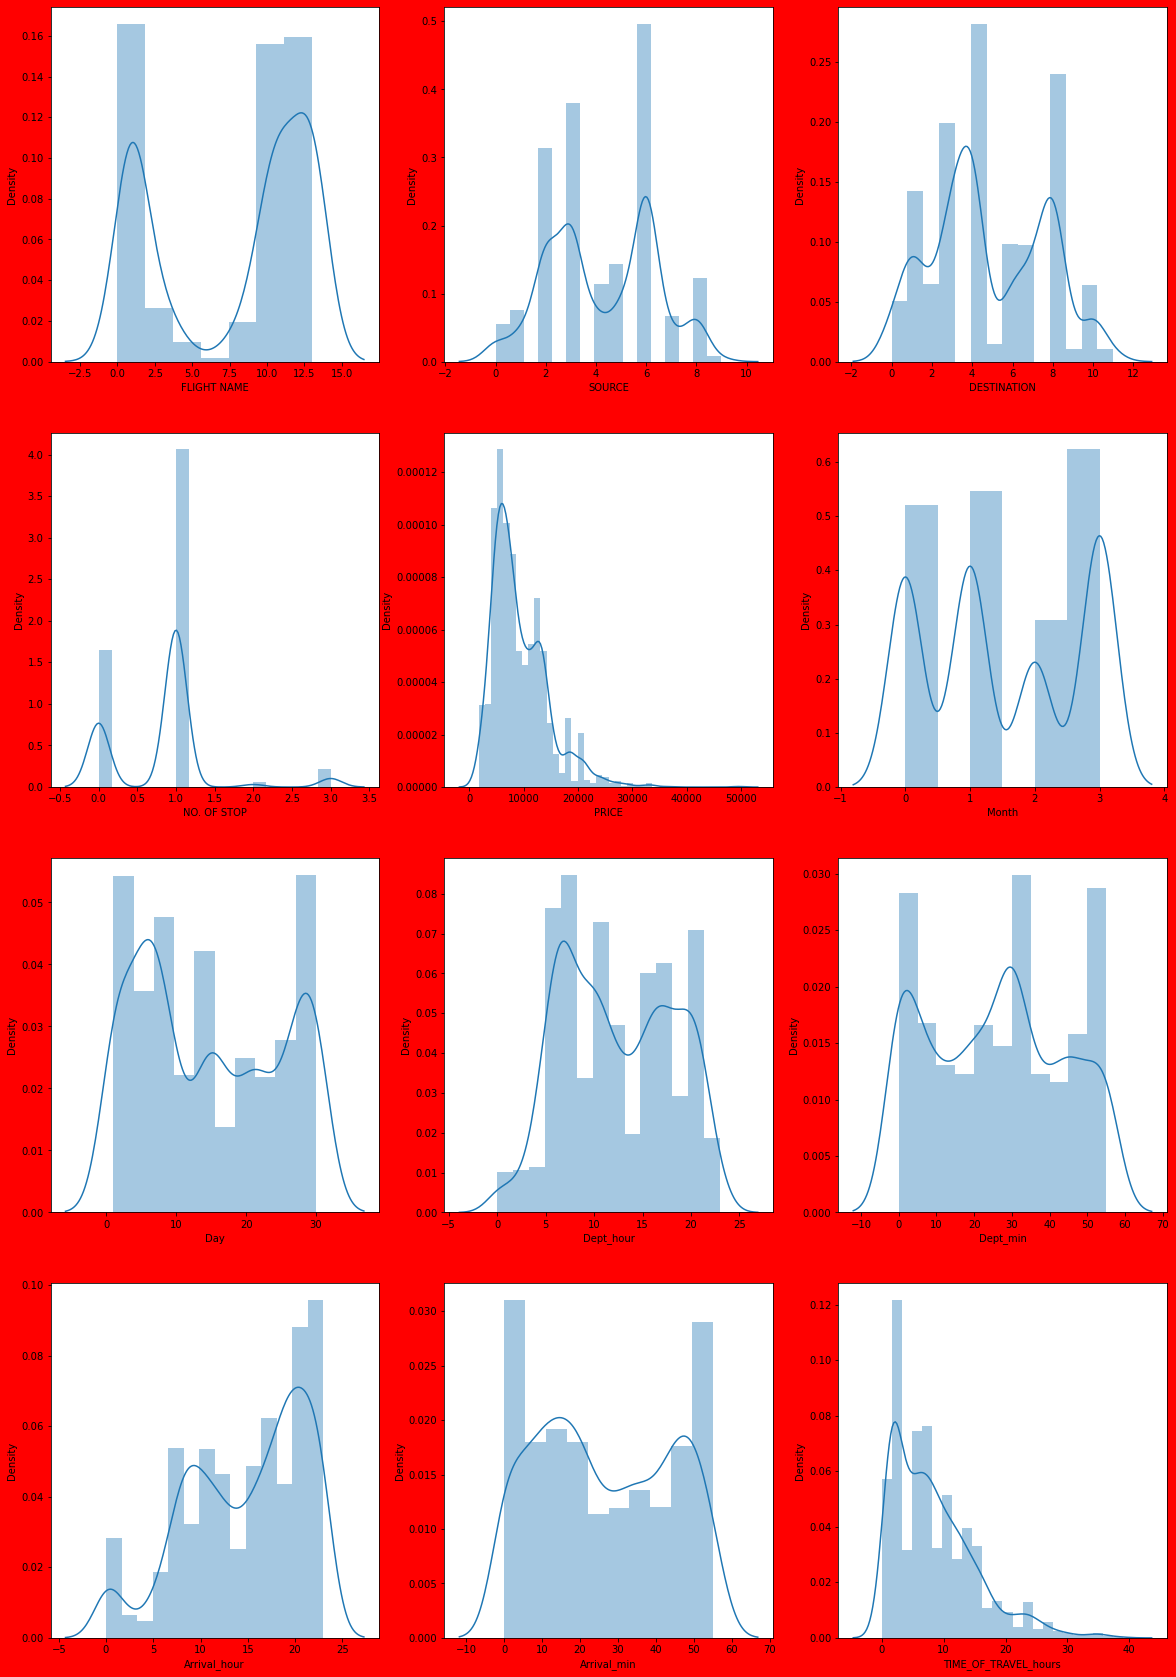

In [37]:
plt.figure(figsize=(20,30),facecolor='red')
plotnumber=1
for column in data:
    if plotnumber<=14:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber+=1
plt.show()

considering only continious fetures  and ignoring categorial features.it can be seen that arrival hour,arrival minute,time to travel_hours are not normalized,as they are not forming bell shape curve.

we can also analyse that most of features are categorial.

In [38]:
data.head()

,FLIGHT NAME,SOURCE,DESTINATION,NO. OF STOP,PRICE,Month,Day,Dept_hour,Dept_min,Arrival_hour,Arrival_min,TIME_OF_TRAVEL_hours
0,3,3,8,3,3987.0,2,30,19,5,2,15,7
1,8,3,8,0,4202.0,2,30,2,40,4,50,2
2,8,3,8,0,4202.0,2,30,7,25,9,40,2
3,8,3,8,0,4202.0,2,30,21,30,23,45,2
4,8,3,8,0,4202.0,2,30,22,45,1,0,2


In [39]:
data.nunique()

FLIGHT NAME              14
SOURCE                   10
DESTINATION              12
NO. OF STOP               4
PRICE                   796
Month                     4
Day                      17
Dept_hour                24
Dept_min                 12
Arrival_hour             24
Arrival_min              12
TIME_OF_TRAVEL_hours     37
dtype: int64

In [40]:
corr=data.corr()
corr

,FLIGHT NAME,SOURCE,DESTINATION,NO. OF STOP,PRICE,Month,Day,Dept_hour,Dept_min,Arrival_hour,Arrival_min,TIME_OF_TRAVEL_hours
FLIGHT NAME,1.000000,0.014355,0.029047,-0.037466,0.118574,0.016217,-0.033243,0.054306,0.071625,0.096573,0.048780,-0.081424
SOURCE,0.014355,1.000000,-0.549522,-0.082497,-0.053942,0.051757,-0.343610,-0.092498,0.057357,0.004677,0.053037,-0.156396
DESTINATION,0.029047,-0.549522,1.000000,0.014294,0.063022,0.051002,0.431959,-0.008649,0.009460,0.001267,-0.107073,-0.030820
NO. OF STOP,-0.037466,-0.082497,0.014294,1.000000,0.492439,0.091537,-0.162949,-0.108210,-0.028302,0.017989,0.011106,0.598974
PRICE,0.118574,-0.053942,0.063022,0.492439,1.000000,0.113841,-0.164745,-0.092854,-0.033387,0.152753,0.027882,0.500598
Month,0.016217,0.051757,0.051002,0.091537,0.113841,1.000000,0.197821,-0.021190,0.046790,0.001897,-0.065332,-0.017136
Day,-0.033243,-0.343610,0.431959,-0.162949,-0.164745,0.197821,1.000000,-0.014228,-0.024380,-0.019958,-0.092740,-0.121401
Dept_hour,0.054306,-0.092498,-0.008649,-0.108210,-0.092854,-0.021190,-0.014228,1.000000,0.087767,0.069193,-0.007549,0.028920
Dept_min,0.071625,0.057357,0.009460,-0.028302,-0.033387,0.046790,-0.024380,0.087767,1.000000,-0.056163,0.043054,-0.062076
Arrival_hour,0.096573,0.004677,0.001267,0.017989,0.152753,0.001897,-0.019958,0.069193,-0.056163,1.000000,-0.017790,0.011351


ploting the heat map to check multicolinearity in the dataset features

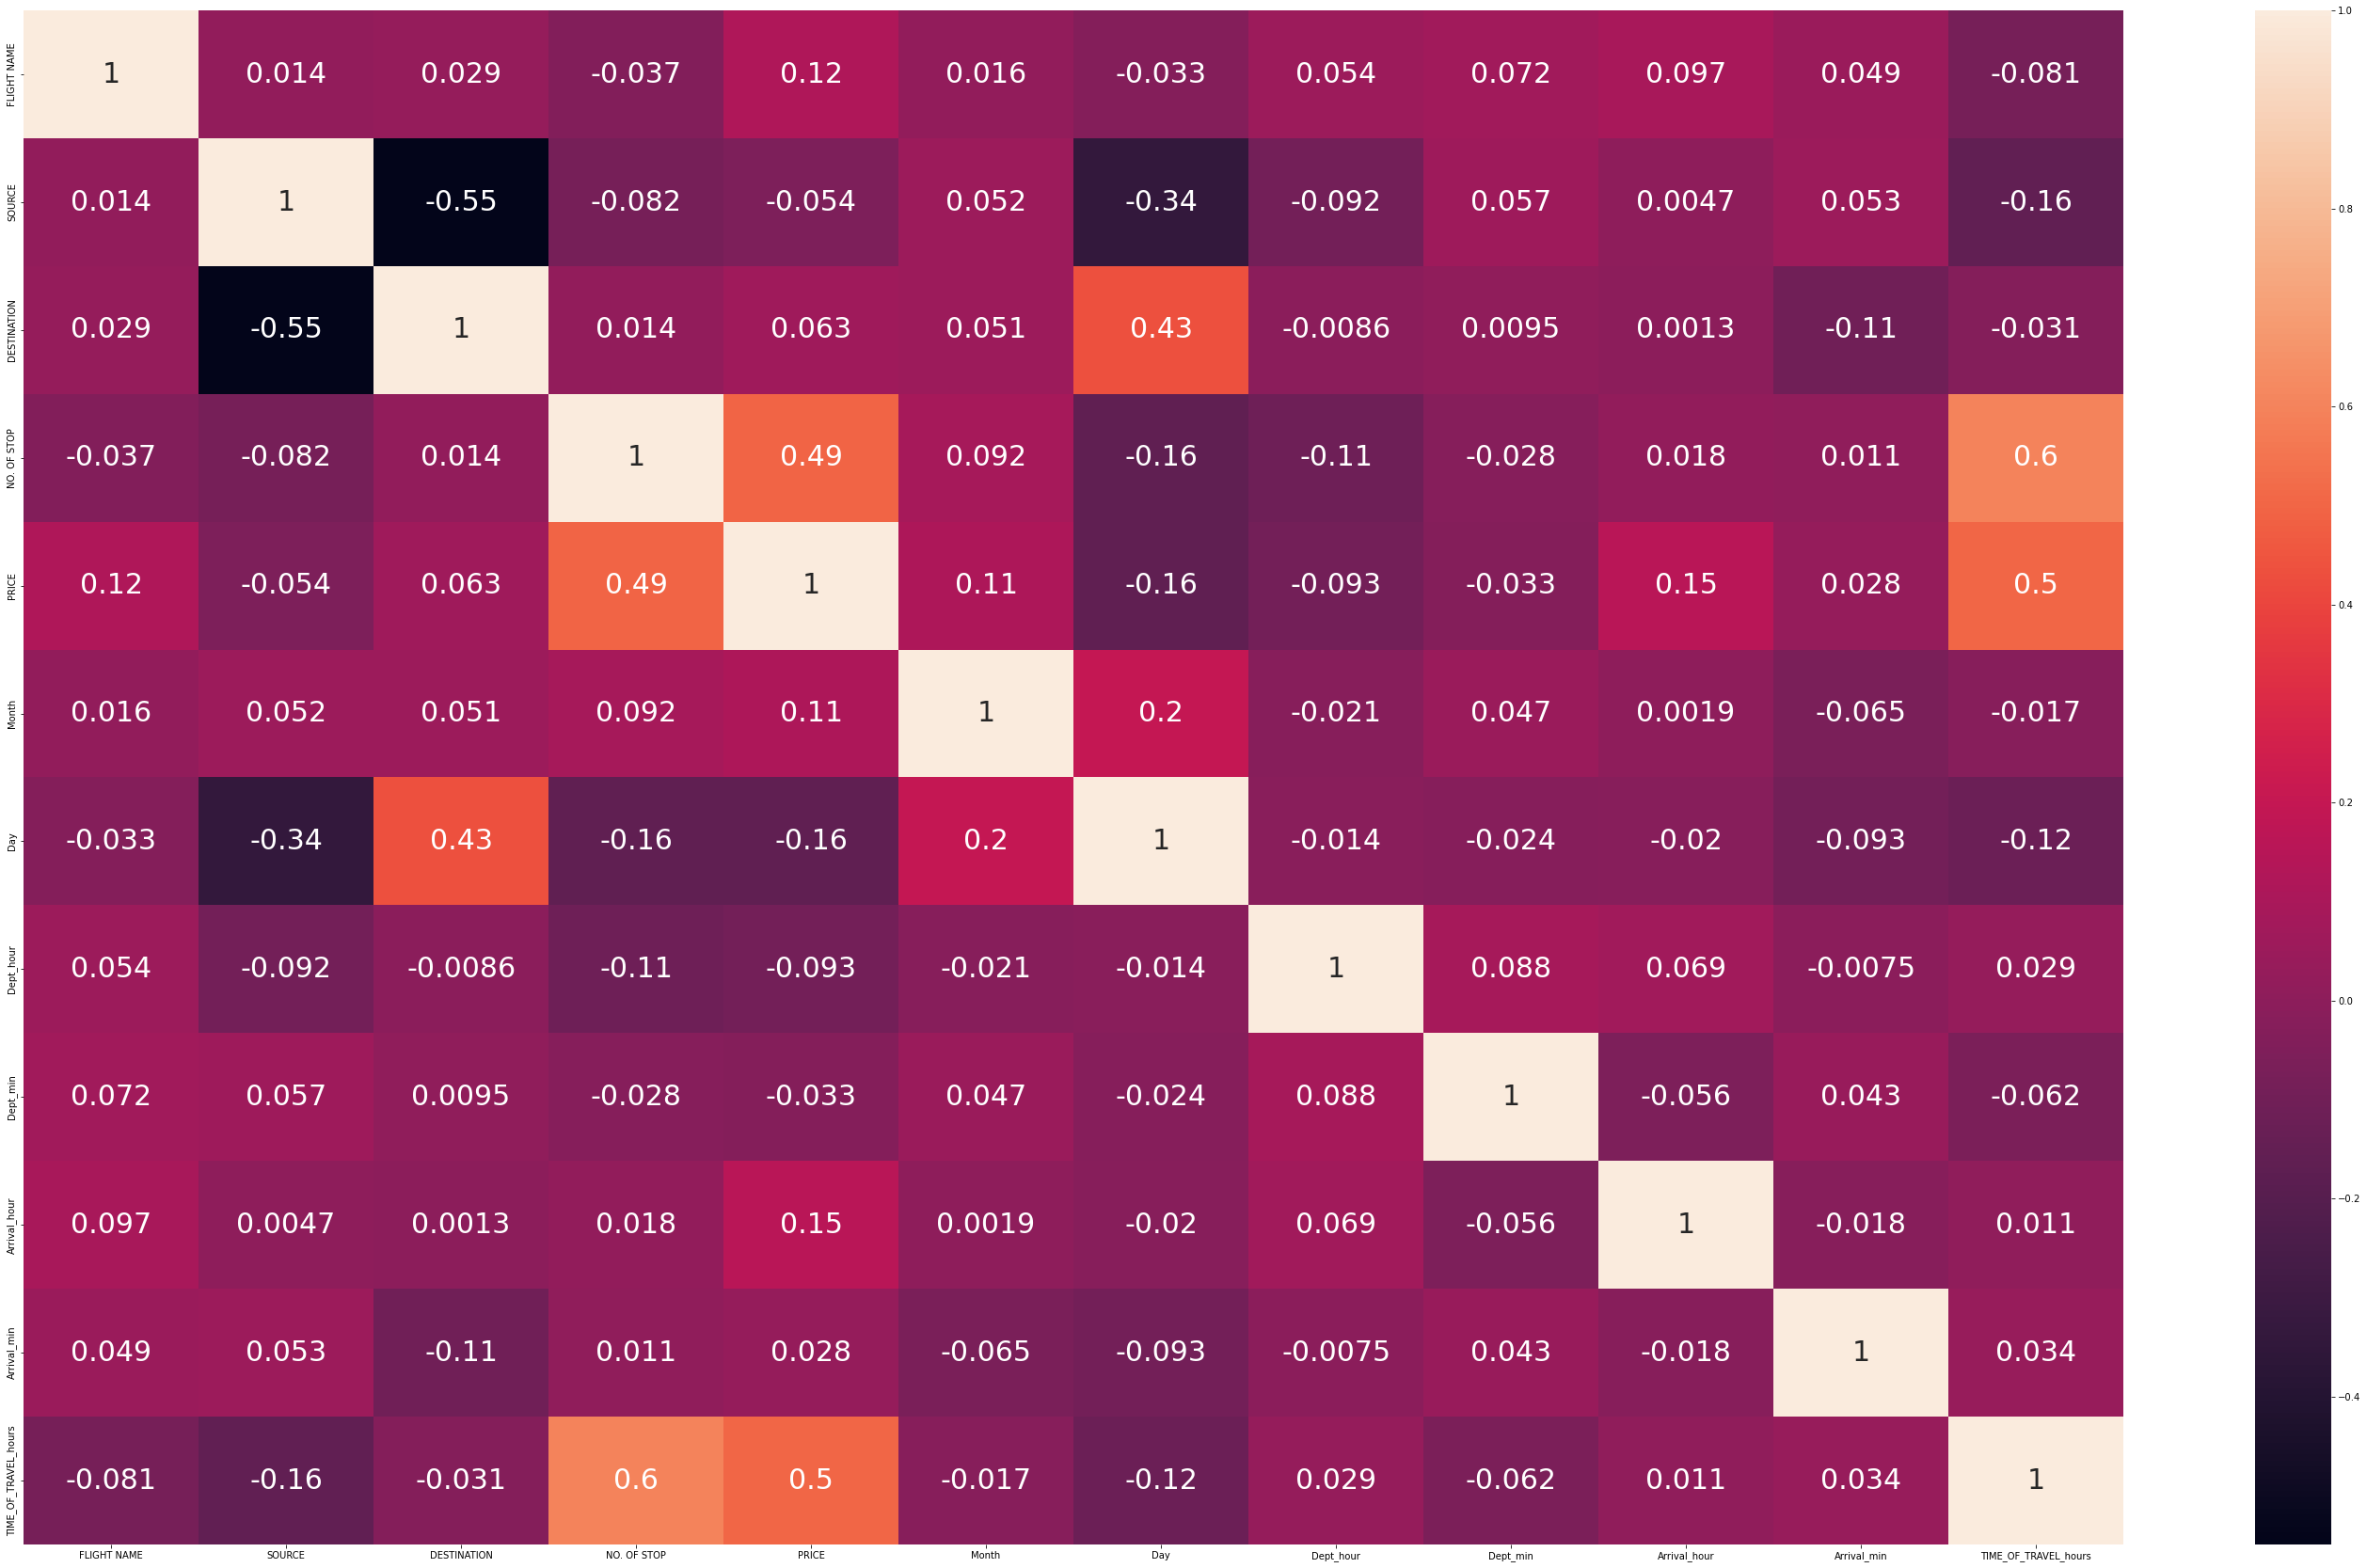

In [41]:
plt.figure(figsize=(50,30))

sns.heatmap(corr,annot=True,annot_kws={'size':30})
plt.show()

From heat map it can be analyse that no two features are tightly corelated with each other and neither any feature is closely related to label in the given dataset

separating the features and label from the data frame.

In [42]:
X=data.drop(columns=['PRICE'])
y=data['PRICE']

Applying the train test split for testing the data.

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88)

from label it can seen that label is continous data,so it is regression problem.

# Applying Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
y_pred = reg_rf.predict(x_test)

In [46]:
reg_rf.score(x_train, y_train)

0.9512084747287497

In [47]:
reg_rf.score(x_test, y_test)

0.7942341834692859

# ADA BOOST

In [48]:
from sklearn.ensemble import AdaBoostRegressor

In [49]:
ada=AdaBoostRegressor()

In [50]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [51]:
y_pred1=ada.predict(x_train)

In [52]:
from sklearn import metrics

In [53]:
accuracy=metrics.r2_score(y_train,y_pred1)
accuracy

0.34088317199185636

In [54]:
y_test_pred=ada.predict(x_test)

In [55]:
accuracy=metrics.r2_score(y_test,y_test_pred)
accuracy

0.3278033822265719

# XGB REGRESSOR

In [56]:
import xgboost as xgb

In [57]:
xgb=xgb.XGBRegressor()

In [58]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [59]:
y_pred3=xgb.predict(x_test)

In [60]:
from sklearn.metrics import r2_score

In [61]:
r2_score(y_test,y_pred3)

0.735455753422827

# Linear Regression

In [62]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [63]:
regression.score(x_train,y_train)

0.3833116083465732

In [64]:
regression.score(x_test,y_test)

0.40405403721033106

In [65]:
y_pred4=regression.predict(x_test)

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_test,y_pred4)

0.40405403721033106

# HYPERPARAMETER TUNING

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
rfr = RandomForestRegressor()

In [70]:
params={'n_estimators':[45,35,20,15,10],"max_features": [1, 2, 3, 5, None],
    "max_leaf_nodes": [5, 10, 20, None],
    "min_samples_leaf": [1, 2, 5, 10, 20, 15]}

In [71]:
# Instantiate the grid search model
rf_random = RandomizedSearchCV(estimator = rfr,param_distributions =params,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [72]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_features': [1, 2, 3, 5, None],
                                        'max_leaf_nodes': [5, 10, 20, None],
                                        'min_samples_leaf': [1, 2, 5, 10, 20,
                                                             15],
                                        'n_estimators': [45, 35, 20, 15, 10]},
                   random_state=35, verbose=2)

In [73]:
rf_random.best_estimator_

RandomForestRegressor(max_features=3, min_samples_leaf=2, n_estimators=35)

In [74]:
rfr = RandomForestRegressor(max_features=3, min_samples_leaf=2, n_estimators=35)

In [75]:
rfr.fit(x_train, y_train)

RandomForestRegressor(max_features=3, min_samples_leaf=2, n_estimators=35)

In [76]:
y_pred6= rfr.predict(x_test)

In [77]:
rfr.score(x_train, y_train)

0.8792927972582131

In [78]:
rfr.score(x_test, y_test)

0.7161508121320483

In [79]:
filename='flight-ticket'
pickle.dump(rfr,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))